# <p style="text-align: center;">MIS 382N: Advanced Machine Learning</p>
# <p style="text-align: center;">Homework 1</p>
## <p style="text-align: center;">Total points: 55</p>
## <p style="text-align: center;">Due: Wednesday, Sep 8 submitted via Canvas by 11:59 pm</p>

Your homework should be written in a **Jupyter notebook**. Please make sure your code runs and the graphics (and anything else) are displayed in your notebook before submitting (%matplotlib inline). **This can be an individual assignment or group of 2. If you choose to do it as a group, please specify who you are working with (name and EID), then only one student should submit the homework.**

**Note: Notebooks MUST have the images embedded in them. There will be no regrades if attached images do not render in the notebook. Please re download from canvas after submission and make sure all attached images render without errors. (Hint: Image module from IPython.display)**

# Question 1: MLOps (10 pts)
Read this [article](https://towardsdatascience.com/what-is-mlops-everything-you-must-know-to-get-started-523f2d0b8bd8) "What is MLOps — Everything You Must Know to Get Started", which gives a quick walkthrough of the machine learning development lifecycle and explains how MLOps come into play, or watch this [video](https://www.youtube.com/watch?v=06-AZXmwHjo) which you may find interesting.

1. (**4 pts**) Use your own words to describe what MLOps is, and what challenges MLOps address. Limit your answer to one paragraph.

2. (**6 pts**) Describe what the main phases in MLOps are. Your answer should be 2-3 paragraphs.


## Answer:

# Question 2: Applications of Machine Learning (5 pts)
Read this [article](https://builtin.com/data-science/data-science-applications-examples) "17 Data Science Applications & Examples" and pick one of the data science systems used by various organizations according to this blog. 

For this system you have chosen, answer the following questions. Please limit your answer to one paragraph:IRS Tax Evasion

1. What kind of machine learning problem is involved (e.g. classification, regression, clustering, outlier detection,...) in this system?

2. Speculate on what kind of data may be needed and how the results can be useful to the organization.

3. What do you think are the ethical implications of using machine learning in a domain like this?

## Answer:
This system takes many variables: spending, social media, and others to predict the estimated cost of this years taxes. Any tax filings that are wildly different from the regression analysis will get audited. Therefore, the IRS will monitor certain spending habits. Looking at major purchases or bank statements would be difficult, I wonder if they are able to look at your bank statements. The article states that the IRS is able to grab data electronic payment patterns, which is concerning. Using social media to montor a person for large purchases would be simple if someone is inclined to show off a new car or house. Again, I am not sure how they know who has which account on social media, even if it is a public account. This broaches an interesting subject about how involved the IRS is in our lives. Using machine learning seems to be helping solve tax fraud, but at the cost of our privacy. The costs do not seem to outweigh the benefits. Being able to research an individual on social media and look inside their bank account seems like a severly unethical approach to finding people who cheat on their taxes. 

# Question 3: Simpson's Paradox (10 pts)
A data scientist should be careful about drawing unwarranted conclusions about any data that is presented. One of the 'gotchas' that can happen even in apparently very simple tabular summaries, is called Simpson's paradox.

Read this [article](https://www.covid-datascience.com/post/israeli-data-how-can-efficacy-vs-severe-disease-be-strong-when-60-of-hospitalized-are-vaccinated), which explains why the computed efficacy of the Pfizer vaccine is misleadingly low (67.5%) when you lump all people together, but once you stratify people by age (which is the right thing to do), you get much higher efficacy numbers.

1.(**5 pts**) Explain in your own words what Simpson's paradox is, and how this 'paradox' can happen in real data.

2.(**5 pts**) Find and mention another example of Simpson's paradox (but not any of the 3 examples given in the Wikipedia entry for 'Simpson's paradox'), state why the paradox appeared in your chosen example. Also give a reference (URL) to your source for the chosen example.

## Answer:

# Question 4: Ridge and Lasso Regression (30 pts)

Download the dataset **Admission.csv** from Canvas and use the following codes to import the Admission dataset in Python. 

There are 7 features in the dataset:

1. GRE score
2. TOEFL score
3. University Rating
4. SOP(Statement of Purpose)
5. LOR(Letter of Recommendation)
6. CGPA
7. Research

And the target is **Chance of Admission**.

In [4]:
# Only use this code block if you are using Google Colab.
# If you are using Jupyter Notebook, please ignore this code block. You can directly upload the file to your Jupyter Notebook file systems.
from google.colab import files

## It will prompt you to select a local file. Click on “Choose Files” then select and upload the file. 
## Wait for the file to be 100% uploaded. You should see the name of the file once Colab has uploaded it.
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [1]:
# Codes below will work for both Google Colab and Jupyter Notebook.
import numpy as np
import pandas as pd
import random
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LogisticRegression

## Load the dataset into pandas DataFrame
df = pd.read_csv('Admission.csv', index_col=0)
df = df.replace([np.inf, -np.inf], np.nan) # 
df = df.fillna(0) # Replace all the NaN values with 0

In [2]:
df.columns # Show you all the columns in this file

Index(['GRE_Score', 'TOEFL_Score', 'University_Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance_of_Admit'],
      dtype='object')

In [3]:
df.head() # Show you the first 5 rows in this file

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df[:10]

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65
6,330,115,5,4.5,3.0,9.34,1,0.90
7,321,109,3,3.0,4.0,8.20,1,0.75
8,308,101,2,3.0,4.0,7.90,0,0.68
9,302,102,1,2.0,1.5,8.00,0,0.50


In [5]:
y = df['Chance_of_Admit'] # The column named Chance_of_Admit is used as the target, and we store it in y
X = df.drop(['Chance_of_Admit'], axis=1) # We keep the remaining columns as the features, and store them in x

1)(**2 pts**) Split the data into a training set(75% of data) and a test set(25% of data), using the [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) function with random_state = 50. Then scale the data (not including target) so that each of the independent variables would have zero mean and unit variance. You can use the [sklearn.preprocessing.scale](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html) function for this. Print the first 5 rows of the training set after scaling.

2)(**5 pts**) Use [sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) classes to do a **5-fold** cross validation using sklearn's KFold. For the sweep of the regularization parameter, we will look at a grid of values ranging from α=10^10 to α=10^−6. In Python, you can consider this range of values as follows: alpha = 10**numpy.linspace(6,-6,100) 
so that you can generate 100 uniform values between -6 to 6 as power series.

Fit the 2 regression models with scaled data and report the best chosen **α** based on cross validation as well as the corresponding scoring metric. The cross validation should happen on your training data using **MSE** as the scoring metric.

3)(**5 pts**) Run ridge and lasso regression for all of the **α** specified above (on training data), and plot the coefficients learned for each of them - there should be one plot each for lasso and ridge, so a total of two plots; different features' weights of each model should be on the same plot with different colors (3pts). 

What do you qualitatively observe when the value of the regularization parameter changes (2pts)? 

4)(**3 pts**) Take the exponential of Y_train as the target, and fit the 2 regression models again. Report the best chosen **α** based on cross validation as well as the corresponding scoring metric. Compare the results of using the original target with the results of using the exponential of the target. What do you observe? 

5)(**5 pts**) Similarly, use [sklearn.linear_model.ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) to do linear regression with different **α** values, and plot the coefficients learned for each of them (2pts). Observe the plot, then explain the pros and cons of ridge, lasso and Elastic Net models (3pts).


6)(**5 pts**) Run the following three regression models with **MSE** loss on the training data: 

a. linear regression without regularization (1pts)

b. linear regression with ridge regularization (2pts)

c. linear regression with lasso regularization (2pts)

For part (b) and (c), use only the best regularization parameters. Report the MSE and R<sup>2</sup> on the test data for each model.

7)(**5 pts**) Train the 3 models and report the metrics with the original data without scaling (3pts). 

Why do we need to scale the data before regularization (2pts)? 

## Answer:


In [6]:
from patsy import dmatrices
%pylab inline
from sklearn.model_selection import train_test_split
import sklearn



#formula =('Chance_of_Admit ~ 0 + GRE_Score + TOEFL_Score+ University_Rating + SOP + CGPA + Research+ LOR ')
#Y, X = dmatrices(formula,df,return_type = 'dataframe')

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state=50)

X_train_scaled = sklearn.preprocessing.scale(X_train,axis = 0, with_std = True)
X_test_scaled = sklearn.preprocessing.scale(X_test,axis = 0, with_std = True)



Populating the interactive namespace from numpy and matplotlib


C:\Users\chand\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [7]:

## scaled training
X_train_scaled[:5]

array([[ 1.52725374,  2.0917706 ,  1.61594354,  0.63150829,  1.72829095,
         2.11370277,  0.90453403],
       [ 0.74180896,  0.46308859, -0.9310778 , -0.35266047, -1.04140609,
         0.29488827,  0.90453403],
       [ 0.56726568,  0.13735218,  1.61594354,  0.63150829,  0.62041214,
         0.26211684,  0.90453403],
       [-0.39272239, -0.51412062, -0.08207069,  0.13942391,  0.62041214,
        -0.80295471, -1.1055416 ],
       [ 0.47999403,  0.78882499,  0.76693642,  1.12359267,  1.17435154,
         1.11417408,  0.90453403]])

In [78]:
cv= KFold(n_splits=5, random_state=50, shuffle= True)
model = Ridge(alpha=.1)

In [76]:
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.linear_model import RidgeClassifierCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Ridge Regression
clf = Ridge(alpha=.1)
clf.fit(X_train_scaled, y_train)


Ridge(alpha=0.1)

In [88]:
from sklearn.metrics import make_scorer
clf = Ridge(alpha=.1)
clf.fit(X_train_scaled, y_train)
score = cross_val_score(model, X_train_scaled, y_train, scoring = make_scorer(mean_squared_error), cv=cv)
score

array([0.00359764, 0.0045903 , 0.0053636 , 0.0029506 , 0.00355246])

In [9]:
residuals = (clf.predict(X_test_scaled)-y_test)**2

In [10]:
MSE = residuals.sum()
MSE

0.5198895484802716

In [11]:
linspace=10**np.linspace(6,-6,100)

In [94]:
from sklearn.linear_model import Lasso
my_dict={ }
for a in linspace:
    clf = Lasso(alpha=a)
    clf.fit(X_train_scaled, y_train)
    score = cross_val_score(clf, X_train_scaled, y_train, scoring = make_scorer(mean_squared_error), cv=cv)
    my_dict[a] = score
    
print(my_dict)


    
    

{1000000.0: array([0.02103589, 0.02159575, 0.01955852, 0.02405097, 0.02104914]), 756463.3275546291: array([0.02103589, 0.02159575, 0.01955852, 0.02405097, 0.02104914]), 572236.765935022: array([0.02103589, 0.02159575, 0.01955852, 0.02405097, 0.02104914]), 432876.12810830615: array([0.02103589, 0.02159575, 0.01955852, 0.02405097, 0.02104914]), 327454.9162877732: array([0.02103589, 0.02159575, 0.01955852, 0.02405097, 0.02104914]), 247707.6355991709: array([0.02103589, 0.02159575, 0.01955852, 0.02405097, 0.02104914]), 187381.7422860383: array([0.02103589, 0.02159575, 0.01955852, 0.02405097, 0.02104914]), 141747.4162926805: array([0.02103589, 0.02159575, 0.01955852, 0.02405097, 0.02104914]), 107226.72220103232: array([0.02103589, 0.02159575, 0.01955852, 0.02405097, 0.02104914]), 81113.08307896872: array([0.02103589, 0.02159575, 0.01955852, 0.02405097, 0.02104914]), 61359.072734131754: array([0.02103589, 0.02159575, 0.01955852, 0.02405097, 0.02104914]), 46415.888336127726: array([0.02103589

In [13]:
MSE_min =min(my_dict.keys())

In [14]:
alpha=my_dict[MSE_min]
print('Alpha = '+ str(alpha))
print('MSE = '+ str(MSE_min))

Alpha = 0.017475284000076828
MSE = 0.5050214280911591


In [15]:
#### Lasso Regression
clf = Ridge(alpha=.1)
clf.fit(X_train_scaled, y_train)

residuals = (clf.predict(X_test_scaled)-y_test)**2

MSE = residuals.sum()

linspace=10**np.linspace(6,-6,100)

my_dict1={ }
for a in linspace:
    clf = Ridge(alpha=a)
    clf.fit(X_train_scaled, y_train)
    residuals = (clf.predict(X_test_scaled)-y_test)**2
    MSE = residuals.sum()
    my_dict1[MSE] = a
    
#print(my_list)

MSE_min2 =min(my_dict1.keys())
 

alpha2=my_dict1[MSE_min2]
print('Alpha = '+ str(alpha2))
print('MSE = '+ str(MSE_min2))

Alpha = 231.01297000831582
MSE = 0.4752600552999041


In [16]:
MSE_min == MSE_min2

False

In [17]:
alpha2 == alpha

False

In [18]:
my_dict1 == my_dict

False

In [69]:
##### 3
## Ridge
my_list=[]
alphas = linspace=10**np.linspace(6,-6,100)
for a in linspace:
    clf = Ridge(alpha=a)
    clf.fit(X_train_scaled, y_train)
    clf.predict(X_test_scaled)
    my_list.append(clf.coef_)
    
#print(my_list)

Serial No.
204    0.97
265    0.75
339    0.81
262    0.71
217    0.91
       ... 
133    0.71
290    0.79
110    0.68
396    0.82
177    0.90
Name: Chance_of_Admit, Length: 300, dtype: float64

In [56]:
import matplotlib.pyplot as plt

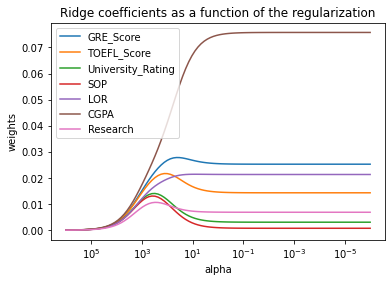

In [72]:
ax = plt.gca()

ax.plot(alphas, my_list)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(X_train.columns, loc='best')
plt.show()



In [73]:

## Lasso
my_list2=[]
alphas = linspace=10**np.linspace(6,-6,100)
for a in linspace:
    clf = Lasso(alpha=a)
    clf.fit(X_train_scaled, y_train)
    clf.predict(X_test_scaled)
    my_list2.append(clf.coef_)
    
#print(my_list2)


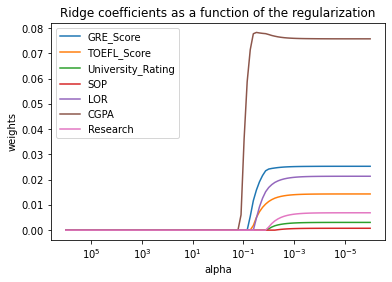

In [74]:
ax = plt.gca()

ax.plot(alphas, my_list2)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend(X_train.columns, loc='best')
plt.show()